In [247]:
#from google.colab import drive
#drive.mount('/content/drive')



# **Load data and libraries**

In [248]:
from sklearn import tree
from sklearn import metrics
import matplotlib.pyplot as plt
import pandas as pd

from google.colab import data_table
from imblearn.over_sampling import SMOTE
from xgboost import cv
from xgboost import XGBClassifier
import xgboost as xgb


from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
clf = DecisionTreeClassifier()
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder


In [249]:
DATA_FILE_PATH = "/content/drive/MyDrive/Task/LoanDefault.csv"
df = pd.read_csv(DATA_FILE_PATH)

print(df[1:10].to_string())

   ID  PROPERTY_VALUE_AMT  TARGET  CRDT_LINE_CNT  DEROG_CNT  DEBT_INC_RTIO_AMT  LOAN_AMT REASON_CDE  YOJ_AMT  MORTGAGE_DUE_AMT  RCNT_CRDT_CNT  OLD_AGE_TRADE_AMT  JOB_CDE  DELINGQ_CNT
1   1             88342.0       0           11.0        0.0          43.717635      4800    HomeImp      7.0           80482.0            0.0         275.032395  ProfExe          0.0
2   2            242602.0       0           26.0        0.0          41.277127     25700    DebtCon      8.0          197425.0            2.0         102.960346    Other          0.0
3   3             68500.0       0           42.0        0.0                NaN     18000    DebtCon     10.0           45000.0            1.0         190.800000  ProfExe          0.0
4   4             55500.0       0           11.0        0.0                NaN      8600    DebtCon      6.0           41126.0            1.0          73.033333    Other          0.0
5   5             64386.0       0           17.0        0.0          36.787306     17

In [250]:
X = df.drop(['TARGET','ID'], axis = 1)
y = df['TARGET']
#print(X)

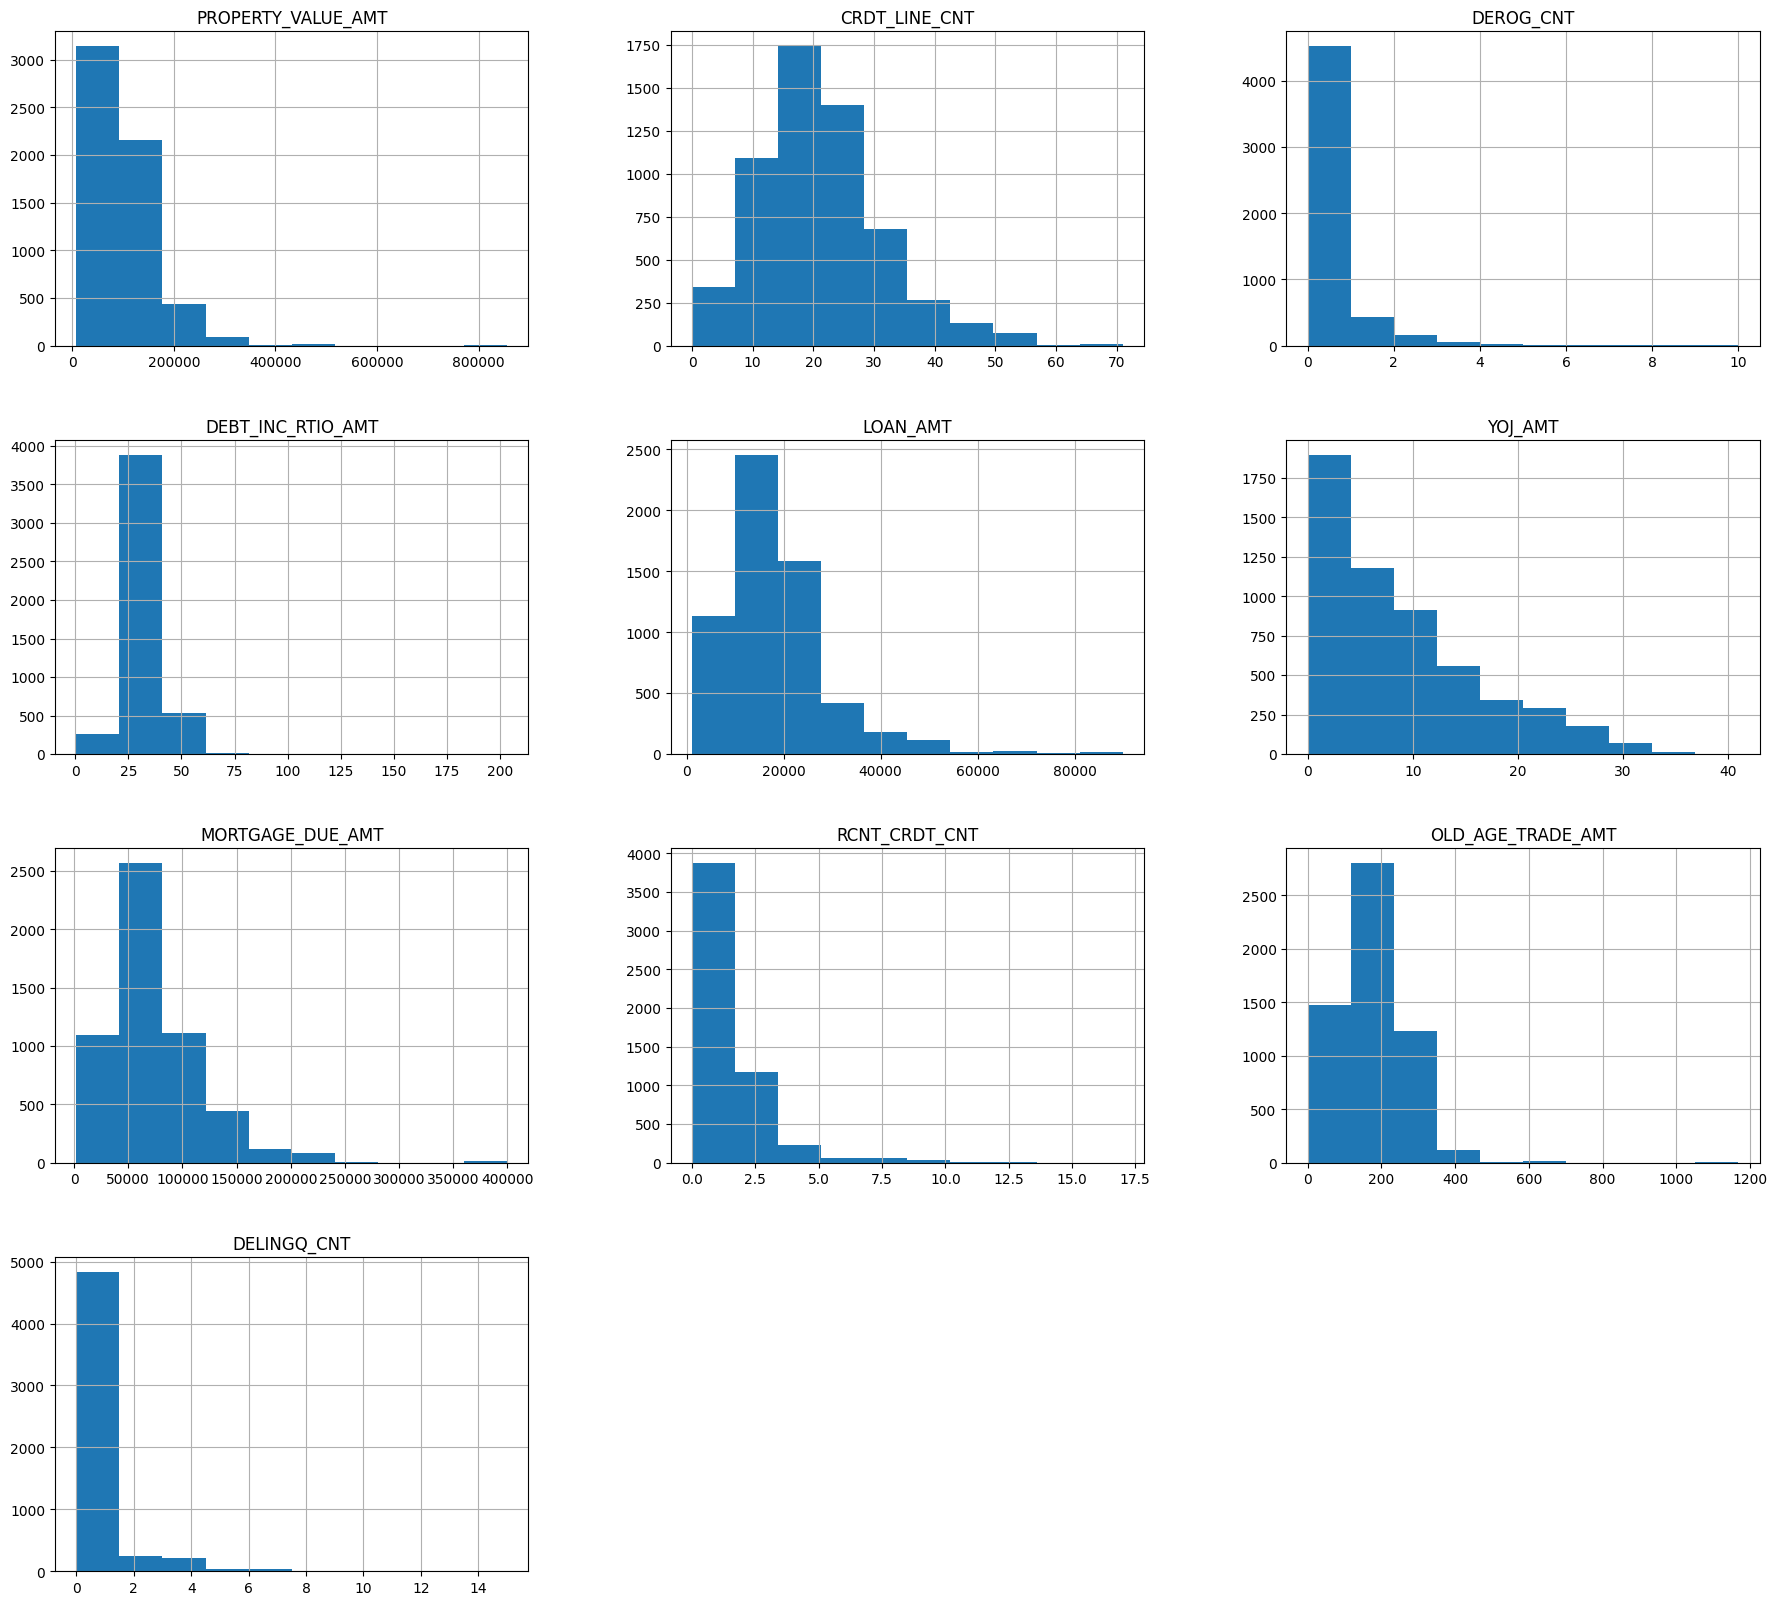

In [251]:
X.hist( figsize = (22, 20) )
plt.show()

# Data **Preprocessing and simple classification**

In [252]:
job = pd.Series(X['JOB_CDE'] )
reason = pd.Series(X['REASON_CDE'] )

le = LabelEncoder()
X['JOB_CDE'] = le.fit_transform(job)
X['REASON_CDE'] = le.fit_transform(reason)

#print(gender)
print(X['REASON_CDE'])



0       0
1       1
2       0
3       0
4       0
       ..
5955    0
5956    0
5957    0
5958    1
5959    0
Name: REASON_CDE, Length: 5960, dtype: int64


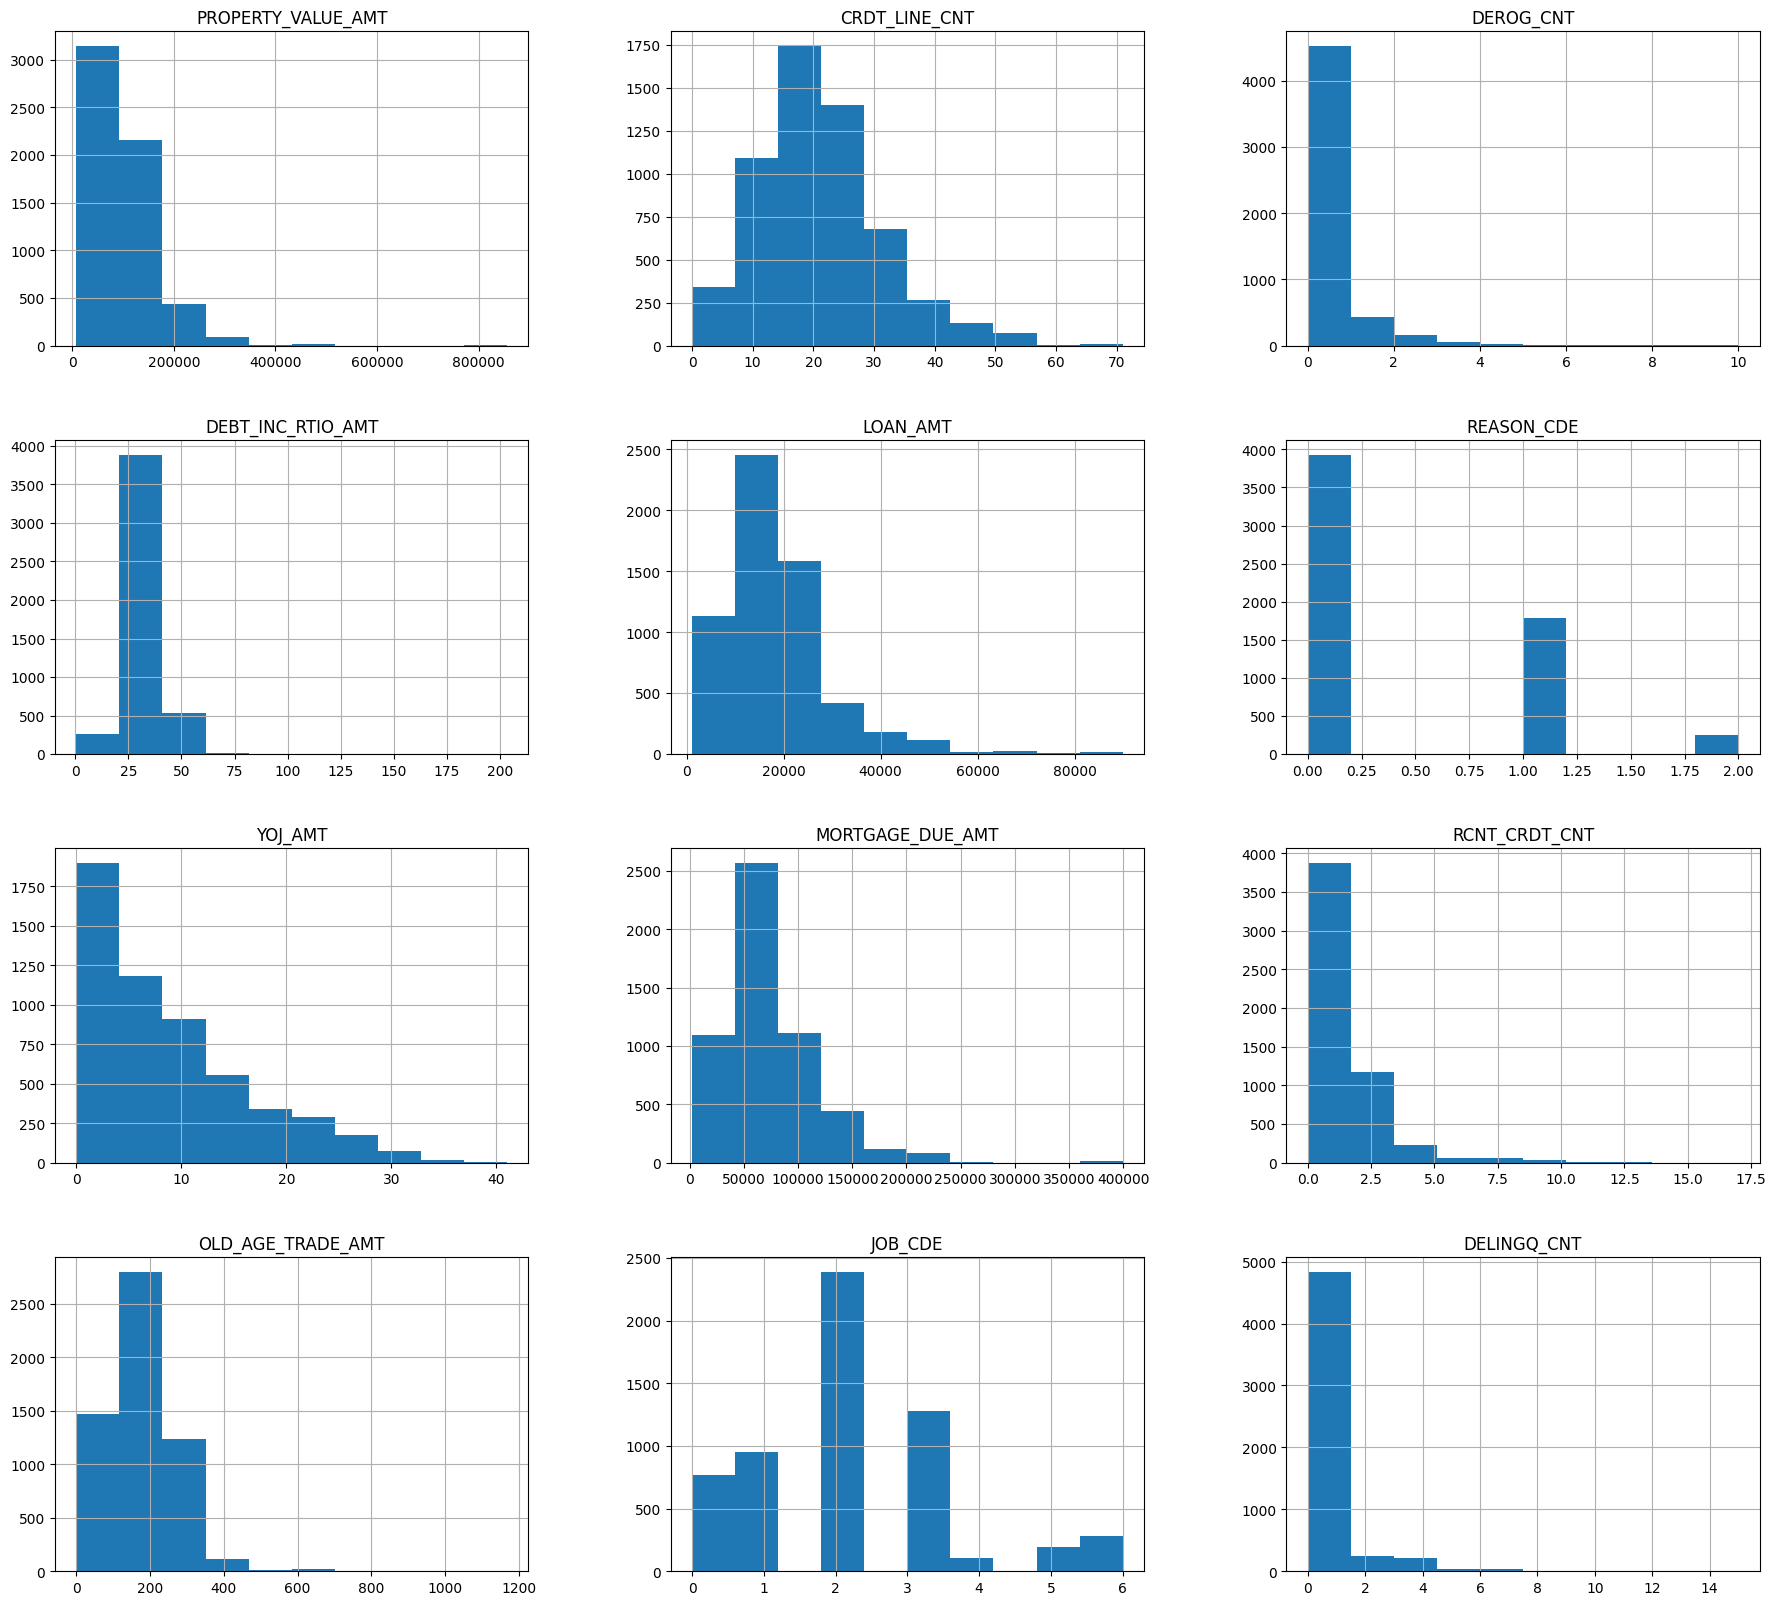

In [253]:
X.hist( figsize = (22, 20) )
plt.show()

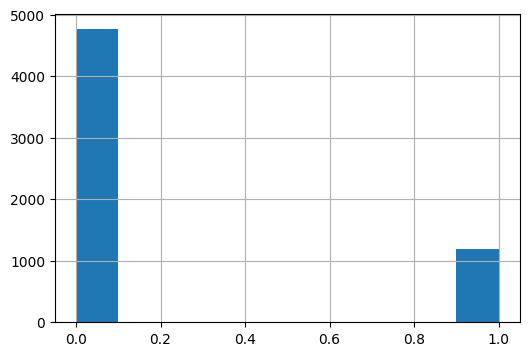

In [254]:
y.hist(  )
plt.show()

In [255]:
X.fillna(X.median(numeric_only=True).round(1), inplace=True)


In [256]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

tree.plot_tree(clf,filled=True)

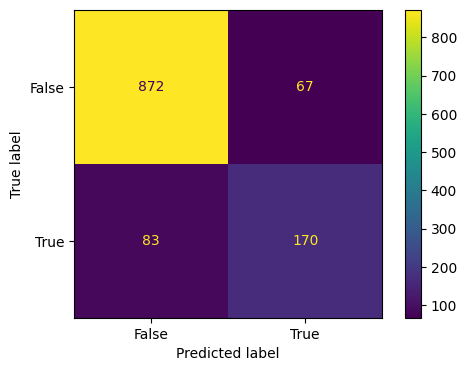

In [258]:


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()


In [259]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Sensitivity_recall:", Sensitivity_recall)
print("Specificity:", Specificity)
print("F1_score:", F1_score)

Accuracy: 0.8741610738255033
Precision: 0.7172995780590717
Sensitivity_recall: 0.6719367588932806
Specificity: 0.9286474973375932
F1_score: 0.6938775510204082


# **XGBoost **

In [260]:

data = xgb.DMatrix(data=X,label=y)

In [261]:

params = {
            'objective':'binary:logistic',
            'max_depth': 4,
            'alpha': 10,
            'learning_rate': 1.0,
            'n_estimators':100
        }

xgb_clf = XGBClassifier(**params)

xgb_clf.fit(X_train, y_train)

XGBClassifier(alpha=10, base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.0, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, ...)

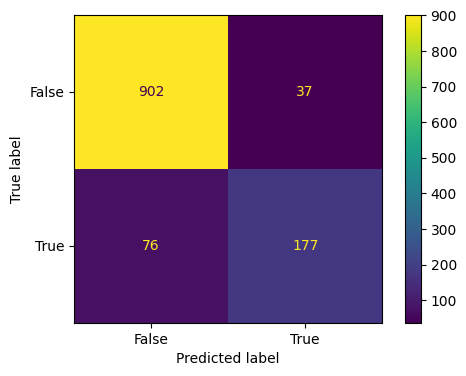

Accuracy: 0.9052013422818792
Precision: 0.8271028037383178
Sensitivity_recall: 0.6996047430830039
Specificity: 0.9605963791267306
F1_score: 0.7580299785867238


In [262]:
y_pred = xgb_clf.predict(X_test)


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Sensitivity_recall:", Sensitivity_recall)
print("Specificity:", Specificity)
print("F1_score:", F1_score)

# **k-fold with XGBoost**


In [263]:

params = {"objective":"binary:logistic",'colsample_bytree': 0.3,'learning_rate': 0.01,
                'max_depth': 5, 'alpha': 10}

xgb_cv = cv(dtrain=data, params=params, nfold=10,
                    num_boost_round=50, early_stopping_rounds=10, metrics="auc", as_pandas=True, seed=123)

xgb_cv.head()


,train-auc-mean,train-auc-std,test-auc-mean,test-auc-std
0,0.662578,0.007598,0.642345,0.024789
1,0.786006,0.002977,0.765193,0.022515
2,0.804004,0.003008,0.779848,0.022974
3,0.896527,0.001455,0.885201,0.011734
4,0.896247,0.001439,0.881071,0.012092


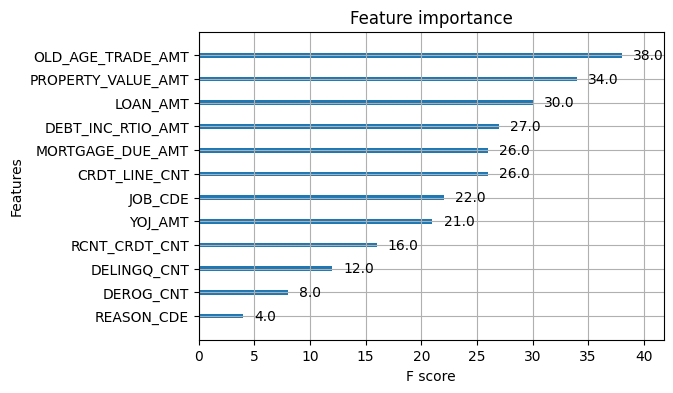

In [264]:
xgb.plot_importance(xgb_clf)
plt.rcParams['figure.figsize'] = [6, 4]
plt.show()

# **Difference between DT on the dataset with and without SMOTE class balancing**

In [ ]:

#from google.colab import data_table
#data_table.DataTable(X)


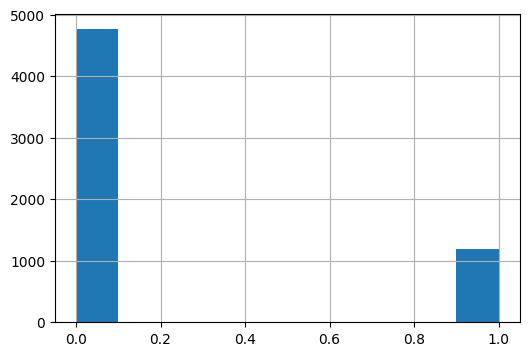

In [266]:
y.hist(  )
plt.show()

In [273]:

oversample = SMOTE()
X_SMOTE, y_SMOTE = oversample.fit_resample(X, y)

#data_table.DataTable(X_SMOTE)


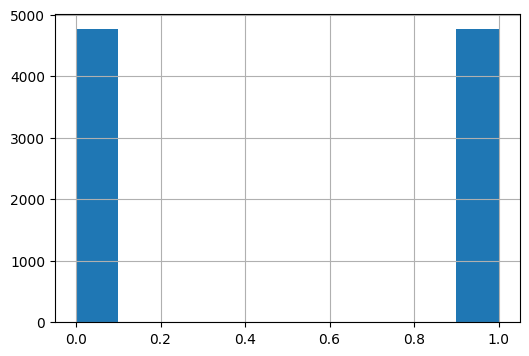

In [275]:
y_SMOTE.hist(  )
plt.show()

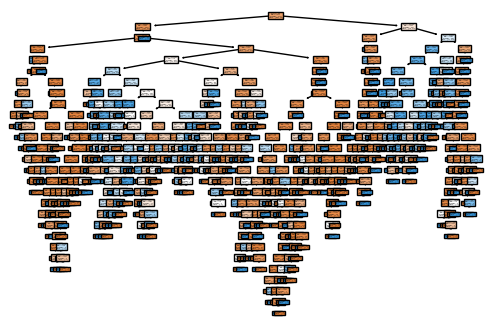

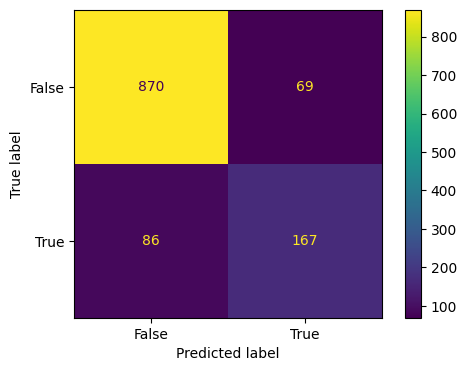

Accuracy: 0.8699664429530202
Precision: 0.7076271186440678
Sensitivity_recall: 0.6600790513833992
Specificity: 0.9265175718849841
F1_score: 0.6830265848670757


In [269]:
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

tree.plot_tree(clf,filled=True)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()
Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Sensitivity_recall:", Sensitivity_recall)
print("Specificity:", Specificity)
print("F1_score:", F1_score)

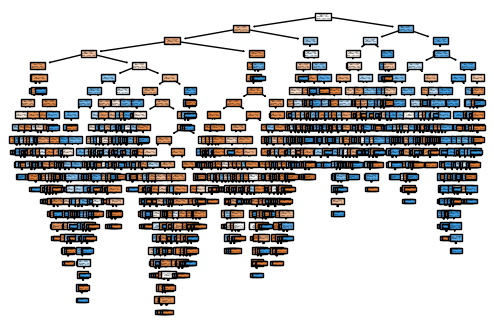

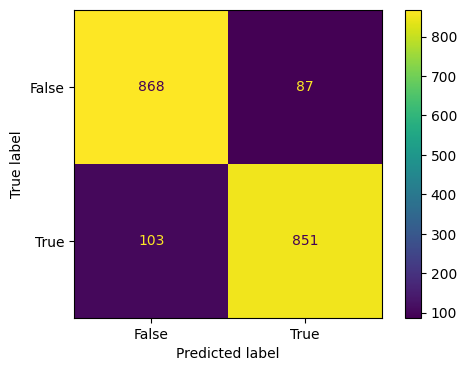

Accuracy: 0.9004714510214772
Precision: 0.9072494669509595
Sensitivity_recall: 0.8920335429769392
Specificity: 0.9089005235602095
F1_score: 0.8995771670190275


In [270]:

X_train, X_test, y_train, y_test = train_test_split(X_SMOTE, y_SMOTE, test_size=0.2, random_state=42)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

tree.plot_tree(clf,filled=True)


confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

Accuracy = metrics.accuracy_score(y_test, y_pred)
Precision = metrics.precision_score(y_test, y_pred)
Sensitivity_recall = metrics.recall_score(y_test, y_pred)
Specificity = metrics.recall_score(y_test, y_pred, pos_label=0)
F1_score = metrics.f1_score(y_test, y_pred)

print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Sensitivity_recall:", Sensitivity_recall)
print("Specificity:", Specificity)
print("F1_score:", F1_score)